# HR Analytics - Feature Elimination

Objective: Create a logistic Reg Model to predict the attrition of employees by using the features available from the datasets given

Created By: Stephen Cole
Creation Date: 18/07/2022

##### Last Updated

In [1]:
from datetime import datetime, timedelta

print(f"Last Updated: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")

Last Updated: 22/08/2022 15:16:32


### Import Packages

In [2]:
import yaml
import os

# All cells use the functions created in the file below
from functions.DS_PreProcessing_Functions import *

pd.set_option("display.max_columns", None, "display.max_rows", 500)

In [3]:
with open (os.path.join(os.getcwd(),'config/attrition_config.yaml'),'r') as stream:
    attrition_propensity_config = yaml.safe_load(stream)
    
path_to_data = attrition_propensity_config['general_config']['path_to_data']

### Load in the Data

In [4]:
X = load_obj('Modelling_dset', path_to_data)
y = load_obj('Target', path_to_data)

In [5]:
X.shape

(4410, 64)

### RFECV

Currently have 64 features to choose from for our model which isn't very reliable as it increases risk to any changes that could occur within the data pipeline which could stop the model from functioning.

In [6]:
# Base modelling parameters
# For more info on parameters see https://xgboost.readthedocs.io/en/stable/parameter.html

params = {
    'objective': 'binary:logistic',  # Set the Objective for the model
    'seed': 5,                       # Set seed for replication
    'nthread': os.cpu_count(),       # Number of cores that is available to use
    'tree_method': 'hist',           # The tree construction algorithm used in XGBoost
    'eval_metric': 'auc'             # Assessing each tree by their AUC value
}

In [7]:
rfecv_1stp = rfe_cv(X=X, y=y, step=1, n_splits=5, params=params)

----- Features:  64  -----
roc_auc_average:  0.9976380649370415
precision_recall_auc_average:  0.9925387973147867
log_loss_average: 0.8191222
precision_average: 0.9925576677318391
step runtime: 0.4835493564605713


----- Features:  63  -----
roc_auc_average:  0.9983329565204577
precision_recall_auc_average:  0.9942534977457882
log_loss_average: 0.8190823999999999
precision_average: 0.9942682265902187
step runtime: 0.44885826110839844


----- Features:  62  -----
roc_auc_average:  0.9980912359266245
precision_recall_auc_average:  0.9931680928363464
log_loss_average: 0.8190823999999999
precision_average: 0.9931862200700474
step runtime: 0.46793413162231445


----- Features:  61  -----
roc_auc_average:  0.9980569763149001
precision_recall_auc_average:  0.9928452206573137
log_loss_average: 0.8190823999999999
precision_average: 0.9928648853752866
step runtime: 0.4941272735595703


----- Features:  60  -----
roc_auc_average:  0.9980912359266245
precision_recall_auc_average:  0.99316809283634

----- Features:  26  -----
roc_auc_average:  0.993847500853876
precision_recall_auc_average:  0.9791652997944198
log_loss_average: 0.8162982
precision_average: 0.9792097744888215
step runtime: 0.3480057716369629


----- Features:  25  -----
roc_auc_average:  0.9937485343786208
precision_recall_auc_average:  0.976873171523029
log_loss_average: 0.817329
precision_average: 0.9769404371459857
step runtime: 0.3398773670196533


----- Features:  24  -----
roc_auc_average:  0.9933345477256168
precision_recall_auc_average:  0.9764366477001969
log_loss_average: 0.8190404000000001
precision_average: 0.97650062531055
step runtime: 0.3583822250366211


----- Features:  23  -----
roc_auc_average:  0.9912366034107443
precision_recall_auc_average:  0.9719701585861072
log_loss_average: 0.818418
precision_average: 0.9720409193617519
step runtime: 0.3418295383453369


----- Features:  22  -----
roc_auc_average:  0.9914343326427606
precision_recall_auc_average:  0.9708724043757101
log_loss_average: 0.817

In [8]:
rfecv_1stp_df = pd.DataFrame(rfecv_1stp).transpose()
rfecv_1stp_df

,feature_importance,roc_auc_average,precision_recall_auc_average,log_loss_average,precision_average
64,maritalstatus_Single 0.039565 ...,0.997638,0.992539,0.819122,0.992558
63,maritalstatus_Single 0.035855 ...,0.998333,0.994253,0.819082,0.994268
62,maritalstatus_Single 0.038247 ...,0.998091,0.993168,0.819082,0.993186
61,maritalstatus_Single 0.035434 ...,0.998057,0.992845,0.819082,0.992865
60,maritalstatus_Single 0.038245 ...,0.998091,0.993168,0.819082,0.993186
59,maritalstatus_Single 0.034686 ...,0.997663,0.991728,0.819082,0.991751
58,maritalstatus_Single 0.035754 ...,0.997522,0.991759,0.819082,0.991781
57,maritalstatus_Single 0.034989 ...,0.998578,0.994094,0.819082,0.994112
56,maritalstatus_Single 0.036753 ...,0.998517,0.994266,0.819082,0.994282
55,maritalstatus_Single 0.037899 ...,0.998919,0.995271,0.819082,0.995285


0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

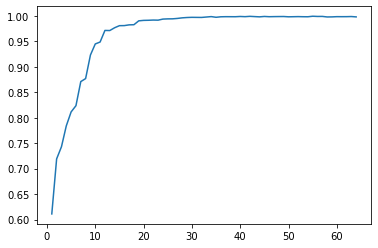

In [9]:
pd.Series(rfecv_1stp_df['roc_auc_average'].plot())

31 features provide a high roc_auc_average whilst not including all the features

In [10]:
selected_features = list(rfecv_1stp_df['feature_importance'][31].index)

In [11]:
selected_features

['maritalstatus_Single',
 'totalworkingyears',
 'businesstravel_Travel_Frequently',
 'environmentsatisfaction_Low',
 'hrs',
 'educationfield_Human Resources',
 'yearswithcurrmanager',
 'jobsatisfaction_Very High',
 'environmentsatisfaction_Very High',
 'age',
 'yearsatcompany',
 'yearssincelastpromotion',
 'educationfield_Life Sciences',
 'numcompaniesworked',
 'gender_Female',
 'jobsatisfaction_Low',
 'worklifebalance_Good',
 'jobrole_Research Director',
 'department_Human Resources',
 'education_Below College',
 'worklifebalance_Bad',
 'environmentsatisfaction_High',
 'jobrole_Sales Representative',
 'maritalstatus_Divorced',
 'worklifebalance_Better',
 'distancefromhome',
 'trainingtimeslastyear',
 'jobsatisfaction_High',
 'education_College',
 'percentsalaryhike',
 'education_Bachelor']

In [12]:
X = X[selected_features]

In [13]:
model_performance(X, y, params)

----- Features:  31  -----
roc_auc_average:  0.9977539830014498
precision_recall_auc_average:  0.9915795749619262
log_loss_average: 0.8204016666666667
precision_average: 0.9915935261953285


Runtime:  0.21883797645568848


### VIF for checking multicollinearity

Want to remove any Features that have a VIF Factor of above 7

In [14]:
vif = vif_cal(selected_features, X)

start_time Mon Aug 22 15:16:59 2022
total_time to calculate VIF Factor 0:00:00.302543


In [15]:
vif

,VIF Factor,Feature
0,1.718954,maritalstatus_Single
1,9.152557,totalworkingyears
2,1.245948,businesstravel_Travel_Frequently
3,1.973309,environmentsatisfaction_Low
4,22.441257,hrs
5,1.808681,educationfield_Human Resources
6,5.792998,yearswithcurrmanager
7,2.62151,jobsatisfaction_Very High
8,2.549147,environmentsatisfaction_Very High
9,28.142906,age


In [16]:
selected_features, X, vif = recalc_vif(selected_features=selected_features, df=X, vif=vif)

start_time Mon Aug 22 15:16:59 2022
total_time to calculate VIF Factor 0:00:00.316079
Feature that was dropped: age (28.143)


In [17]:
vif

,VIF Factor,Feature
0,1.717276,maritalstatus_Single
1,6.175294,totalworkingyears
2,1.24585,businesstravel_Travel_Frequently
3,1.96185,environmentsatisfaction_Low
4,20.001982,hrs
5,1.804075,educationfield_Human Resources
6,5.792861,yearswithcurrmanager
7,2.604032,jobsatisfaction_Very High
8,2.534678,environmentsatisfaction_Very High
9,9.10651,yearsatcompany


In [18]:
model_performance(X, y, params)

----- Features:  30  -----
roc_auc_average:  0.9961364857419556
precision_recall_auc_average:  0.9867622982346416
log_loss_average: 0.8225739999999999
precision_average: 0.9867841930979903


Runtime:  0.28734755516052246


In [19]:
selected_features, X, vif = recalc_vif(selected_features=selected_features, df=X, vif=vif)

start_time Mon Aug 22 15:17:00 2022
total_time to calculate VIF Factor 0:00:00.252417
Feature that was dropped: hrs (20.002)


In [20]:
vif

,VIF Factor,Feature
0,1.708913,maritalstatus_Single
1,6.152308,totalworkingyears
2,1.238427,businesstravel_Travel_Frequently
3,1.947259,environmentsatisfaction_Low
4,1.797566,educationfield_Human Resources
5,5.785652,yearswithcurrmanager
6,2.523412,jobsatisfaction_Very High
7,2.48226,environmentsatisfaction_Very High
8,9.106189,yearsatcompany
9,2.405332,yearssincelastpromotion


In [21]:
model_performance(X, y, params)

----- Features:  29  -----
roc_auc_average:  0.995868423784282
precision_recall_auc_average:  0.9852239196438669
log_loss_average: 0.7943760000000001
precision_average: 0.985250116705652


Runtime:  0.26496458053588867


In [22]:
selected_features, X, vif = recalc_vif(selected_features=selected_features, df=X, vif=vif)

start_time Mon Aug 22 15:17:01 2022
total_time to calculate VIF Factor 0:00:00.260363
Feature that was dropped: percentsalaryhike (12.288)


In [23]:
vif

,VIF Factor,Feature
0,1.688706,maritalstatus_Single
1,6.140904,totalworkingyears
2,1.234832,businesstravel_Travel_Frequently
3,1.866188,environmentsatisfaction_Low
4,1.797118,educationfield_Human Resources
5,5.778471,yearswithcurrmanager
6,2.433491,jobsatisfaction_Very High
7,2.38464,environmentsatisfaction_Very High
8,9.100564,yearsatcompany
9,2.405066,yearssincelastpromotion


In [24]:
model_performance(X, y, params)

----- Features:  28  -----
roc_auc_average:  0.9945018781447375
precision_recall_auc_average:  0.9799492808392932
log_loss_average: 0.7918546666666666
precision_average: 0.9799817492955037


Runtime:  0.2536931037902832


In [25]:
selected_features, X, vif = recalc_vif(selected_features=selected_features, df=X, vif=vif)

start_time Mon Aug 22 15:17:01 2022
total_time to calculate VIF Factor 0:00:00.223562
Feature that was dropped: yearsatcompany (9.101)


In [26]:
vif

,VIF Factor,Feature
0,1.688706,maritalstatus_Single
1,4.629499,totalworkingyears
2,1.234819,businesstravel_Travel_Frequently
3,1.866184,environmentsatisfaction_Low
4,1.796153,educationfield_Human Resources
5,3.661632,yearswithcurrmanager
6,2.432977,jobsatisfaction_Very High
7,2.38464,environmentsatisfaction_Very High
8,2.105788,yearssincelastpromotion
9,1.717094,educationfield_Life Sciences


In [27]:
vif.loc[vif['VIF Factor'] > 7,:]

,VIF Factor,Feature


In [28]:
model_performance(X, y, params)

----- Features:  27  -----
roc_auc_average:  0.9909326616955432
precision_recall_auc_average:  0.9703976934209511
log_loss_average: 0.7900043333333334
precision_average: 0.9704400998458601


Runtime:  0.2477095127105713


We have removed all signs of multicollinearity which has improved the robustness and accuracy of our model. Now we have to fit a basic model and hyper parameter tune the model to help acocunt for over/under fitting whilst improving the performance.

In [29]:
selected_features

['maritalstatus_Single',
 'totalworkingyears',
 'businesstravel_Travel_Frequently',
 'environmentsatisfaction_Low',
 'educationfield_Human Resources',
 'yearswithcurrmanager',
 'jobsatisfaction_Very High',
 'environmentsatisfaction_Very High',
 'yearssincelastpromotion',
 'educationfield_Life Sciences',
 'numcompaniesworked',
 'gender_Female',
 'jobsatisfaction_Low',
 'worklifebalance_Good',
 'jobrole_Research Director',
 'department_Human Resources',
 'education_Below College',
 'worklifebalance_Bad',
 'environmentsatisfaction_High',
 'jobrole_Sales Representative',
 'maritalstatus_Divorced',
 'worklifebalance_Better',
 'distancefromhome',
 'trainingtimeslastyear',
 'jobsatisfaction_High',
 'education_College',
 'education_Bachelor']

In [30]:
len(selected_features)

27

In [31]:
# Save features to be read into HPT notebook

save_obj(selected_features, 
         'features', 
         path_to_data)